2. Reduce dimensionality of activity, keeping 95% of variance
3. Compute per-network correlations using CCA
4. Reduce distance matrix to 2D using MDS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("colorblind")
sns.set_context("poster")

import torch
from torch import nn
device = torch.device("cpu")
dtype = torch.float
import sys
sys.path.append("../src")
import models
import cdi

In [44]:
import os
files = [f for f in os.listdir("../data/") if ('csv' not in f) and ('vanilla' in f) ]

In [12]:
params = (64, 2, 30, 1, -1)#args.batch_size, args.K, args.T, args.mu_max, -args.mu_max)
##  Load parameters and create network
import h5py
def load_network(fname):
    with h5py.File("../data/%s"%fname, 'r') as hf:
      d = {k: np.array(v) for k, v in hf.items()}
    if 'tanh' in fname:
        rnn = models.RNN(1, 128, f = torch.tanh)
    elif 'relu' in fname:
        rnn = models.RNN(1, 128, f = torch.relu)
    rnn.Win = torch.nn.Parameter(torch.tensor(d['Win']))
    rnn.Wrec = torch.nn.Parameter(torch.tensor(d['Wred']))
    rnn.Wout = torch.nn.Parameter(torch.tensor(d['Wout']))
    rnn.b = torch.nn.Parameter(torch.tensor(d['b']))
    return rnn
rnn1 = load_network(files[0])
rnn2 = load_network(files[1])

In [17]:
X, Xcontext, Y, mu= cdi.gen_batch(params)
X = torch.cat((X, Xcontext),-1)
_, h1 = rnn1(X)
_, h2 = rnn2(X)

## Reduce dimensionality with PCA

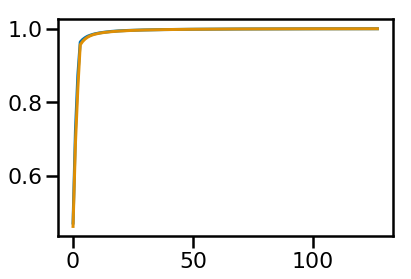

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
hred = []
for h in [h1, h2]:
    hi = h.reshape((-1, 128)).detach().numpy()
    pca.fit(hi)
    plt.plot(pca.explained_variance_ratio_.cumsum())
    npc = np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]
    hred.append(pca.fit_transform(hi)[:,:npc])

## Compute correlation using CCA

In [39]:
from sklearn.cross_decomposition import CCA
cca = CCA(3)
cca.fit(hred[0], hred[1])
cca.score(hred[0], hred[1])

0.7574547591649998

# Process all

1
2


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


3
4


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


5
6


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


7
8
9
10
11


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


12
13
14
15
16
17
18


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


19
20
21
22
23
24


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


25
26
27
28
29


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


30
31
32


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


33
34
35


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


36
37
38
39


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


40
41
42
43
44
45
46


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


47
48
49


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


50
51
52


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


53
54


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


55
56
57
58


/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


59
60


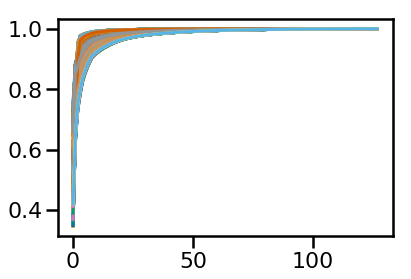

In [47]:
i = 0
cor_mat = np.zeros((len(files), len(files)))
for f1 in files:
    j = 0
    for f2 in files:
        # Load the networks
        rnn1 = load_network(f1)
        rnn2 = load_network(f2)
        # Compute activities
        X, Xcontext, Y, mu= cdi.gen_batch(params)
        X = torch.cat((X, Xcontext),-1)
        _, h1 = rnn1(X)
        _, h2 = rnn2(X)
        # Reduce dimension using PCA
        hred = []
        for h in [h1, h2]:
            hi = h.reshape((-1, 128)).detach().numpy()
            pca.fit(hi)
            npc = 3 # Always 3np.where(pca.explained_variance_ratio_.cumsum() > 0.95)[0][0]
            hred.append(pca.fit_transform(hi)[:,:npc])
        cca = CCA(3)
        cca.fit(hred[0], hred[1])
        cor_mat[i,j] = cca.score(hred[0], hred[1])
        j+=1
    i+=1 
    print(i)

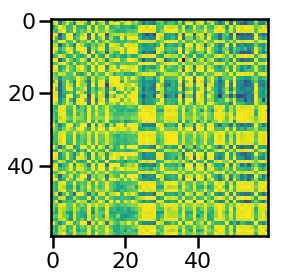

In [49]:
plt.imshow(cor_mat)

## Visualize using MDS

In [51]:
cor_mat.min(), cor_mat.max()

(-0.3378919142731862, 0.9999999999999992)

In [53]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
D = 1 - cor_mat
D_transformed = embedding.fit_transform(D)
D_transformed.shape

/cognition/home/jkeijser/anaconda3/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(60, 2)

In [60]:
identity = []
for f in files:
    if 'tanh' in f:
        identity.append(1)
    elif 'relu' in f:
        identity.append(0)
len(identity)

60

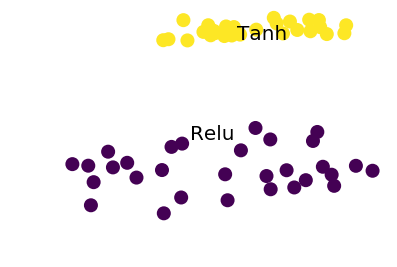

In [91]:
plt.scatter(D_transformed[:,0], D_transformed[:,1], c = identity)

plt.text(0, 1.5, "Tanh", fontsize=20)
plt.text(-0.4, -1, "Relu", fontsize=20)
plt.axis('off');
plt.savefig("../figures/svcca_mds", dpi=300)

What do far-away relus look like, compared to close-by? And relatively close-by tanh/relus?